In [8]:
!pip install simpy

In [2]:
import simpy
import random


def customer(env, name, cashiers):
  milk_required = random.randint(1,5)
  print(f'{name}: Arrives at time: {env.now :.2f}, and requires {milk_required}L milk.')
  yield env.timeout(milk_required)
  print(f'{name}: finishes retrieving the milk at time: {env.now :.2f}.')
  with cashiers.request() as cashier_req:
    yield cashier_req
    print(f'{name}: gets a cashier at time: {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: leaves at time: {env.now :.2f}')

def customer_generator(env, cashiers):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2) 
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f"customer {cust_number}", cashiers=cashiers))
    cust_number += 1


random.seed(2)

env = simpy.Environment()

cashiers = simpy.Resource(env=env, capacity=2)

env.process(customer_generator(env=env, cashiers=cashiers))

env.run(until=10) # 10 minutes

customer 1: Arrives at time: 1.56, and requires 1L milk.
customer 1: finishes retrieving the milk at time: 2.56.
customer 1: gets a cashier at time: 2.56.
customer 2: Arrives at time: 3.04, and requires 3L milk.
customer 3: Arrives at time: 3.09, and requires 3L milk.
customer 4: Arrives at time: 3.99, and requires 2L milk.
customer 5: Arrives at time: 4.13, and requires 5L milk.
customer 1: leaves at time: 4.56
customer 6: Arrives at time: 4.60, and requires 4L milk.
customer 7: Arrives at time: 5.17, and requires 5L milk.
customer 8: Arrives at time: 5.68, and requires 5L milk.
customer 4: finishes retrieving the milk at time: 5.99.
customer 4: gets a cashier at time: 5.99.
customer 2: finishes retrieving the milk at time: 6.04.
customer 2: gets a cashier at time: 6.04.
customer 3: finishes retrieving the milk at time: 6.09.
customer 9: Arrives at time: 7.17, and requires 5L milk.
customer 4: leaves at time: 7.99
customer 3: gets a cashier at time: 7.99.
customer 2: leaves at time: 8

### Containers

In [3]:
import simpy
import random


def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f'{name}: Arrives at time: {env.now :.2f}, and requires {milk_required}L milk.')

  yield env.timeout(milk_required)
  yield fridge.get(milk_required)

  print(f'{name}: finishes retrieving the milk at time: {env.now :.2f}. Fridge has {fridge.level}L milk remaining.')
  with cashiers.request() as cashier_req:
    yield cashier_req
    print(f'{name}: gets a cashier at time: {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: leaves at time: {env.now :.2f}')

def customer_generator(env, cashiers, fridge):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2) 
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f"customer {cust_number}", cashiers=cashiers, fridge=fridge))
    cust_number += 1


random.seed(2)

env = simpy.Environment()

cashiers = simpy.Resource(env=env, capacity=2)

fridge = simpy.Container(env=env, capacity=50, init=15)

env.process(customer_generator(env=env, cashiers=cashiers, fridge=fridge))

env.run(until=10) # 10 minutes

customer 1: Arrives at time: 1.56, and requires 1L milk.
customer 1: finishes retrieving the milk at time: 2.56. Fridge has 14L milk remaining.
customer 1: gets a cashier at time: 2.56.
customer 2: Arrives at time: 3.04, and requires 3L milk.
customer 3: Arrives at time: 3.09, and requires 3L milk.
customer 4: Arrives at time: 3.99, and requires 2L milk.
customer 5: Arrives at time: 4.13, and requires 5L milk.
customer 1: leaves at time: 4.56
customer 6: Arrives at time: 4.60, and requires 4L milk.
customer 7: Arrives at time: 5.17, and requires 5L milk.
customer 8: Arrives at time: 5.68, and requires 5L milk.
customer 4: finishes retrieving the milk at time: 5.99. Fridge has 12L milk remaining.
customer 4: gets a cashier at time: 5.99.
customer 2: finishes retrieving the milk at time: 6.04. Fridge has 9L milk remaining.
customer 2: gets a cashier at time: 6.04.
customer 3: finishes retrieving the milk at time: 6.09. Fridge has 6L milk remaining.
customer 9: Arrives at time: 7.17, and 

In [4]:
import simpy
import random


def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f'{name}: Arrives at time: {env.now :.2f}, and requires {milk_required}L milk.')

  with fridge['resource'].request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required)
    yield fridge['milk_container'].get(milk_required)

  print(f'{name}: finishes retrieving the milk at time: {env.now :.2f}. Fridge has {fridge["milk_container"].level}L milk remaining.')
  with cashiers.request() as cashier_req:
    yield cashier_req
    print(f'{name}: gets a cashier at time: {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: leaves at time: {env.now :.2f}')

def customer_generator(env, cashiers, fridge):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2) 
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f"customer {cust_number}", cashiers=cashiers, fridge=fridge))
    cust_number += 1


random.seed(2)

env = simpy.Environment()

cashiers = simpy.Resource(env=env, capacity=2)

fridge = {'resource': simpy.Resource(env=env, capacity=1), 'milk_container': simpy.Container(env=env, capacity=50, init=15)}

env.process(customer_generator(env=env, cashiers=cashiers, fridge=fridge))

env.run(until=10) # 10 minutes

customer 1: Arrives at time: 1.56, and requires 1L milk.
customer 1: finishes retrieving the milk at time: 2.56. Fridge has 14L milk remaining.
customer 1: gets a cashier at time: 2.56.
customer 2: Arrives at time: 3.04, and requires 3L milk.
customer 3: Arrives at time: 3.09, and requires 3L milk.
customer 4: Arrives at time: 3.99, and requires 2L milk.
customer 5: Arrives at time: 4.13, and requires 5L milk.
customer 1: leaves at time: 4.56
customer 6: Arrives at time: 4.60, and requires 4L milk.
customer 7: Arrives at time: 5.17, and requires 5L milk.
customer 8: Arrives at time: 5.68, and requires 5L milk.
customer 2: finishes retrieving the milk at time: 6.04. Fridge has 11L milk remaining.
customer 2: gets a cashier at time: 6.04.
customer 9: Arrives at time: 7.17, and requires 5L milk.
customer 2: leaves at time: 8.04
customer 10: Arrives at time: 8.55, and requires 1L milk.
customer 11: Arrives at time: 8.70, and requires 3L milk.
customer 3: finishes retrieving the milk at tim

### yielding a process

In [5]:
import simpy
import random


def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f'{name}: Arrives at time: {env.now :.2f}, and requires {milk_required}L milk.')

  with fridge['resource'].request() as fridge_req:
    yield fridge_req
    yield env.timeout(milk_required)
    yield fridge['milk_container'].get(milk_required)

  print(f'{name}: finishes retrieving the milk at time: {env.now :.2f}. Fridge has {fridge["milk_container"].level}L milk remaining.')
  with cashiers.request() as cashier_req:
    yield cashier_req
    print(f'{name}: gets a cashier at time: {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: leaves at time: {env.now :.2f}')

def customer_generator(env, cashiers, fridge):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 2) 
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f"customer {cust_number}", cashiers=cashiers, fridge=fridge))
    cust_number += 1

def fridge_control_process(env, fridge):
  while True:
    if fridge['milk_container'].level < 5:
      yield env.process(fridge_refill_process(env, fridge))

    yield env.timeout(random.uniform(10,20))

def fridge_refill_process(env, fridge):
  print(f"Fridge refill process called at time {env.now:.2f}. Fridge has {fridge['milk_container'].level}L milk.")
  yield env.timeout(2) # 2 minutes
  to_refill = 15 - fridge['milk_container'].level
  print(f"Fridge has {fridge['milk_container'].level}L milk. Fridge filled with {to_refill}L milk.")
  yield fridge['milk_container'].put(to_refill)


random.seed(2)

env = simpy.Environment()

cashiers = simpy.Resource(env=env, capacity=2)

fridge = {'resource': simpy.Resource(env=env, capacity=1), 'milk_container': simpy.Container(env=env, capacity=50, init=15)}

env.process(customer_generator(env=env, cashiers=cashiers, fridge=fridge))
env.process(fridge_control_process(env=env, fridge=fridge))
env.run(until=60) # 60 minutes 

customer 1: Arrives at time: 1.56, and requires 1L milk.
customer 2: Arrives at time: 1.59, and requires 2L milk.
customer 3: Arrives at time: 1.82, and requires 3L milk.
customer 4: Arrives at time: 2.48, and requires 2L milk.
customer 1: finishes retrieving the milk at time: 2.56. Fridge has 14L milk remaining.
customer 1: gets a cashier at time: 2.56.
customer 5: Arrives at time: 2.63, and requires 5L milk.
customer 6: Arrives at time: 3.09, and requires 4L milk.
customer 7: Arrives at time: 3.66, and requires 5L milk.
customer 8: Arrives at time: 4.17, and requires 5L milk.
customer 1: leaves at time: 4.56
customer 2: finishes retrieving the milk at time: 4.56. Fridge has 12L milk remaining.
customer 2: gets a cashier at time: 4.56.
customer 9: Arrives at time: 5.66, and requires 5L milk.
customer 2: leaves at time: 6.56
customer 10: Arrives at time: 7.04, and requires 1L milk.
customer 11: Arrives at time: 7.19, and requires 3L milk.
customer 3: finishes retrieving the milk at tim

### Condition Event

In [7]:
import simpy
import random


def customer(env, name, cashiers, fridge):
  milk_required = random.randint(1,5)
  print(f'{name}: Arrives at time: {env.now :.2f}, and requires {milk_required}L milk.')

  with fridge['resource'].request() as fridge_req:
    res = yield fridge_req | env.timeout(10, value='timeout_10')
    print(res)

    if fridge_req in res:
      yield env.timeout(milk_required)
      yield fridge['milk_container'].get(milk_required)
    else:
      print(f"{name}: left without buying milk at time: {env.now:.2f}.")
      return

  print(f'{name}: finishes retrieving the milk at time: {env.now :.2f}. Fridge has {fridge["milk_container"].level}L milk remaining.')
  with cashiers.request() as cashier_req:
    yield cashier_req
    print(f'{name}: gets a cashier at time: {env.now :.2f}.')
    yield env.timeout(2)
    print(f'{name}: leaves at time: {env.now :.2f}')

def customer_generator(env, cashiers, fridge):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 0.5) 
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f"customer {cust_number}", cashiers=cashiers, fridge=fridge))
    cust_number += 1

def fridge_control_process(env, fridge):
  while True:
    if fridge['milk_container'].level < 5:
      yield env.process(fridge_refill_process(env, fridge))

    yield env.timeout(random.uniform(10,20))

def fridge_refill_process(env, fridge):
  print(f"Fridge refill process called at time {env.now:.2f}. Fridge has {fridge['milk_container'].level}L milk.")
  yield env.timeout(2) # 2 minutes
  to_refill = 15 - fridge['milk_container'].level
  print(f"Fridge has {fridge['milk_container'].level}L milk. Fridge filled with {to_refill}L milk.")
  yield fridge['milk_container'].put(to_refill)


random.seed(2)

env = simpy.Environment()

cashiers = simpy.Resource(env=env, capacity=2)

fridge = {'resource': simpy.Resource(env=env, capacity=1), 'milk_container': simpy.Container(env=env, capacity=50, init=15)}

env.process(customer_generator(env=env, cashiers=cashiers, fridge=fridge))
env.process(fridge_control_process(env=env, fridge=fridge))
env.run(until=60) # 60 minutes 

customer 1: Arrives at time: 6.25, and requires 1L milk.
<ConditionValue {<Request() object at 0x7f76837b17d0>: None}>
customer 2: Arrives at time: 6.37, and requires 2L milk.
customer 1: finishes retrieving the milk at time: 7.25. Fridge has 14L milk remaining.
customer 1: gets a cashier at time: 7.25.
<ConditionValue {<Request() object at 0x7f767c6ba910>: None}>
customer 3: Arrives at time: 7.26, and requires 3L milk.
customer 1: leaves at time: 9.25
customer 2: finishes retrieving the milk at time: 9.25. Fridge has 12L milk remaining.
customer 2: gets a cashier at time: 9.25.
<ConditionValue {<Request() object at 0x7f767c703510>: None}>
customer 4: Arrives at time: 9.92, and requires 2L milk.
customer 5: Arrives at time: 10.50, and requires 5L milk.
customer 2: leaves at time: 11.25
customer 3: finishes retrieving the milk at time: 12.25. Fridge has 9L milk remaining.
customer 3: gets a cashier at time: 12.25.
<ConditionValue {<Request() object at 0x7f76837b1450>: None}>
customer 6:

### Business KPI ###
#### Number of Fridges vs Lost Customers ####

In [10]:
import simpy
import random
import numpy as np

SIM_TIME = 1 * 24 * 60 # 1 day

stats = {'customers_lost':0,
         'customers_lost_iter':[],
         'customers_lost_experiment':[]}

def customer(env, name, cashiers, fridges):
  milk_required = random.randint(1,5)
  # print(f'{name}: Arrives at time: {env.now :.2f}, and requires {milk_required}L milk.')
  waiting_customers = [len(fridge['resource'].queue) for fridge in fridges]

  fridge_num = waiting_customers.index(min(waiting_customers))

  fridge = fridges[fridge_num]

  with fridge['resource'].request() as fridge_req:
    res = yield fridge_req | env.timeout(10, value='timeout_10')
    # print(res)

    if fridge_req in res:
      yield env.timeout(milk_required)
      yield fridge['milk_container'].get(milk_required)
    else:
      # print(f"{name}: left without buying milk at time: {env.now:.2f}.")
      stats['customers_lost'] += 1
      return

  # print(f'{name}: finishes retrieving the milk at time: {env.now :.2f}. Fridge has {fridge["milk_container"].level}L milk remaining.')
  with cashiers.request() as cashier_req:
    yield cashier_req
    # print(f'{name}: gets a cashier at time: {env.now :.2f}.')
    yield env.timeout(2)
    # print(f'{name}: leaves at time: {env.now :.2f}')

def customer_generator(env, cashiers, fridges):
  cust_number = 1
  while True:
    random_inter_arrival_time = random.expovariate(lambd = 0.5) 
    yield env.timeout(random_inter_arrival_time)
    env.process(customer(env=env, name=f"customer {cust_number}", cashiers=cashiers, fridges=fridges))
    cust_number += 1

def fridge_control_process(env, fridge):
  while True:
    if fridge['milk_container'].level < 5:
      yield env.process(fridge_refill_process(env, fridge))

    yield env.timeout(random.uniform(10,20))

def fridge_refill_process(env, fridge):
  # print(f"Fridge refill process called at time {env.now:.2f}. Fridge has {fridge['milk_container'].level}L milk.")
  yield env.timeout(2) # 2 minutes
  to_refill = 15 - fridge['milk_container'].level
  # print(f"Fridge has {fridge['milk_container'].level}L milk. Fridge filled with {to_refill}L milk.")
  yield fridge['milk_container'].put(to_refill)

for num_fridges in range(1,11):
  for r in range(10):
    random.seed(r)

    env = simpy.Environment()

    cashiers = simpy.Resource(env=env, capacity=2)

    fridges = [{'resource': simpy.Resource(env=env, capacity=1), 'milk_container': simpy.Container(env=env, capacity=50, init=15)} for i in range(num_fridges)]

    env.process(customer_generator(env=env, cashiers=cashiers, fridges=fridges))
    for fridge in fridges:
      env.process(fridge_control_process(env=env, fridge=fridge))

    env.run(until=SIM_TIME) # 60 minutes

    stats['customers_lost_iter'].append(stats['customers_lost'])
    stats['customers_lost'] = 0
  stats['customers_lost_experiment'].append(np.mean(stats['customers_lost_iter']))
  stats['customers_lost_iter'] = []

In [11]:
stats

{'customers_lost': 0,
 'customers_lost_experiment': [340.7,
  82.8,
  26.1,
  19.3,
  18.7,
  14.8,
  15.7,
  16.6,
  18.4,
  17.1],
 'customers_lost_iter': []}

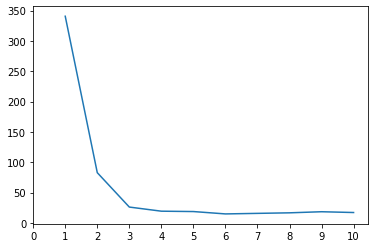

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1,11), stats['customers_lost_experiment']);
plt.xticks(range(11));